In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Physics 5BL: RC and RLC Circuits

### Week 9

### Objective

In this experiment, we will study the transient behavior of a simple RC circuit. We will measure the time constant of the circuit and compare it to the theoretical value. We will also measure the time constant of a circuit with a resistor and a capacitor in series and compare it to the theoretical value.

## Part 1A: RC Circuits


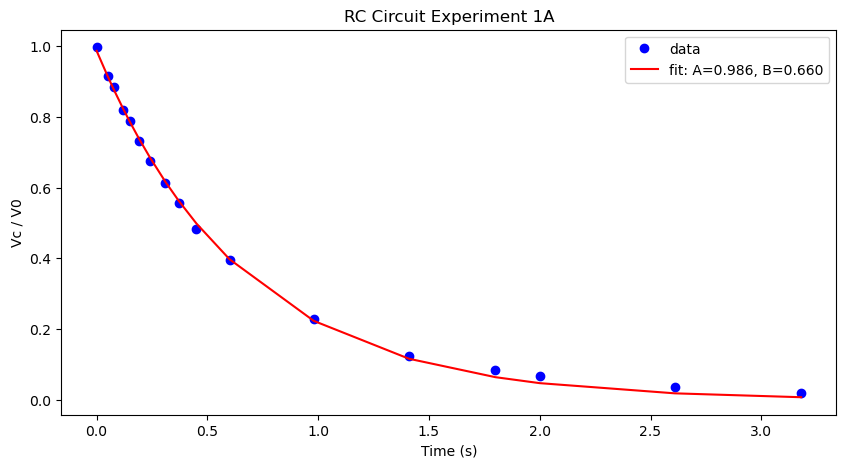

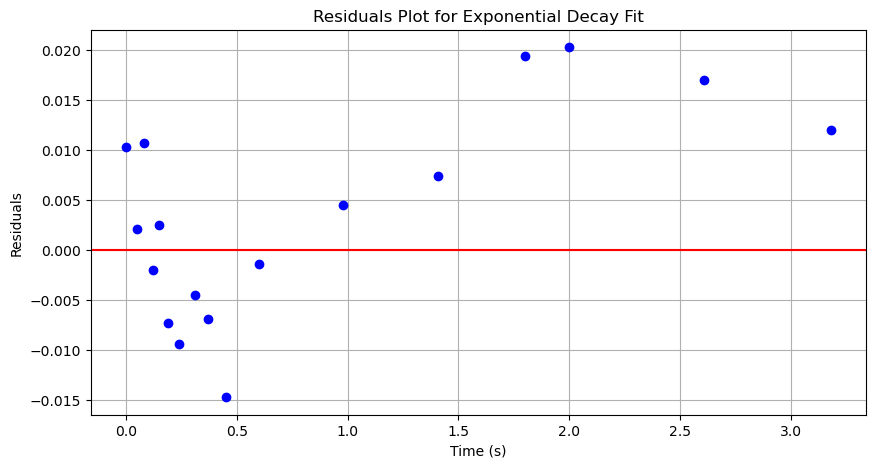

In [33]:
# fit the time and voltage to an exponential decay and plot it  
def part1a():
    time = [
        -1.9,
        -1.85,
        -1.82,
        -1.78,
        -1.75,
        -1.71,
        -1.66,
        -1.59,
        -1.53,
        -1.45,
        -1.3,
        -0.92,
        -0.49,
        -0.10,
        0.10,
        0.71,
        1.28,
    ]
    voltage = [9.96,
               9.16,
               8.84,
               8.20,
               7.88,
               7.32,
               6.76,
               6.12,
               5.56,
               4.84,
               3.96,
               2.28,
               1.24,
               0.84,
               0.68,
               0.36,
               0.2,
               ]
    
    # divide each voltage by 10 (V0)
    divided_voltages = [v / 10 for v in voltage]
    time_centered = [t + 1.9 for t in time]
    
    def exp_decay(t, A, B):
        return A * np.exp(- t / B)


    popt, popc = curve_fit(exp_decay, time_centered, divided_voltages, p0=[5, 1])
    plt.figure(figsize=(10, 5))
    plt.plot(time_centered, divided_voltages, 'bo', label='data')
    plt.plot(time_centered, exp_decay(np.array(time_centered), *popt), 'r-', label='fit: A=%5.3f, B=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Vc / V0')
    plt.title('RC Circuit Experiment 1A')
    plt.legend()
    plt.show()

    residuals_exp_decay = divided_voltages - exp_decay(np.array(time_centered), *popt)

    plt.figure(figsize=(10, 5))
    plt.plot(time_centered, residuals_exp_decay, 'bo')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Time (s)')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot for Exponential Decay Fit')
    plt.grid()
    plt.show()

part1a()

## Part 1B: RC Circuits with homemade capacitor

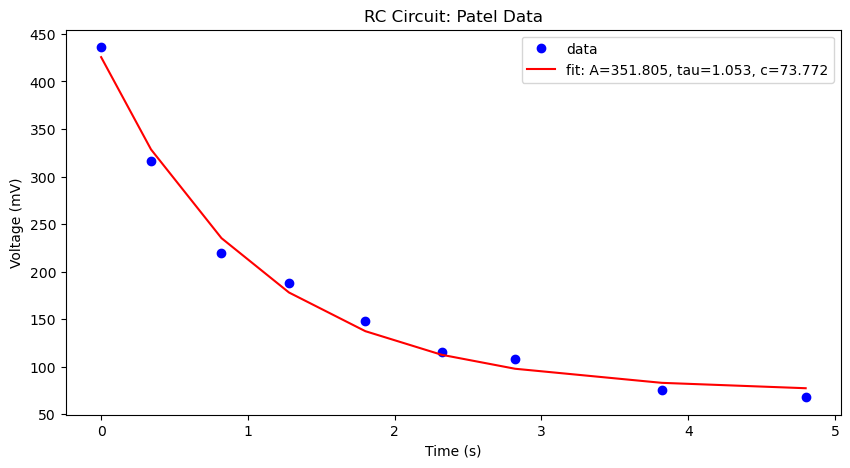

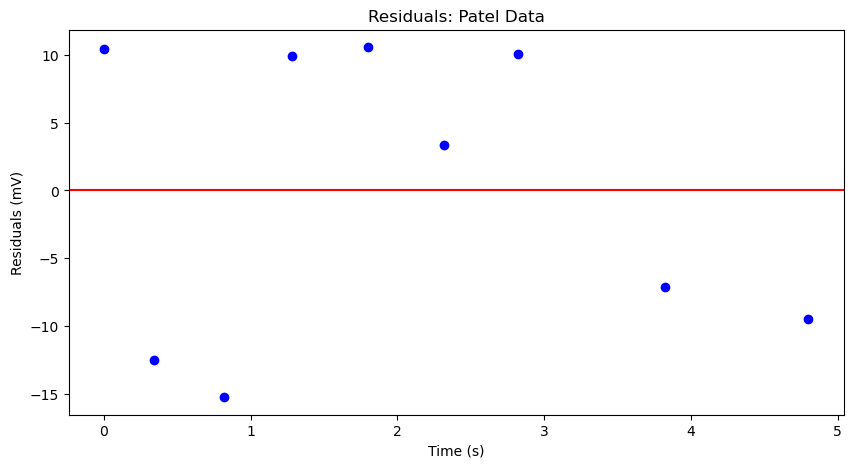

Data used: Patel
C: 9.496807616995816e-07


In [32]:
def part1b():
    timeP = [-1.8, -1.46,-0.98,-0.52,0,0.52,1.02,2.02,3,]
    timeP_centered = [t + 1.8 for t in timeP]
    voltageP = [436,316,220,188,148,116,108,76,68,]
    timeC = [-1.90,-1.48,-1.0,-0.46,0,0.48,1.0,1.52,2.76,]
    timeC_centered = [t + 1.9 for t in timeP]
    voltageC = [524,396,324,276,244,228,204,188,148,]
    data_used = ""

    def usePData():
        nonlocal data_used
        data_used = "Patel"
        return timeP_centered, voltageP
    def useCData():
        nonlocal data_used
        data_used = "Capinski"
        return timeC_centered, voltageC
    
    time, voltage = usePData() # change this to use the other data
    
    def exp_decay(t, A, B, c):
        return A * np.exp(- t / B) + c

    popt, popc = curve_fit(exp_decay, time, voltage, p0=[5, 1, 0])
    plt.figure(figsize=(10, 5))
    plt.plot(time, voltage, 'bo', label='data')
    plt.plot(time, exp_decay(np.array(time), *popt), 'r-', label='fit: A=%5.3f, tau=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title(f'RC Circuit: ' + data_used + ' Data')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(time, voltage - exp_decay(np.array(time), *popt), 'bo')
    plt.axhline(0, color='r')
    plt.xlabel('Time (s)')
    plt.ylabel('Residuals (mV)')
    plt.title('Residuals: ' + data_used + ' Data')
    plt.show()
    
    # find the capacitance
    tau = 1/popt[1]
    R = 1000000
    C = tau / R
    print("Data used:", data_used)
    print("C:", C)
    
    
    # FUNKY BUSINESS GOIN ON HERE
    
    # # estimate an effective dielectric constant
    # A = 200e-3 * 130e-3 # slightly different per data set
    # d = 0.0001
    # e0 = 8.85e-12
    # # C = e * e0 * A / d
    # e_exp = 3.8
    # C_exp = e_exp * e0 * A / d
    # print("C_exp:", C_exp)
    # e = C * d / (e0 * A)
    # print("e:", e)
    
part1b()

## Part 2A: Underdamped RLC Circuit


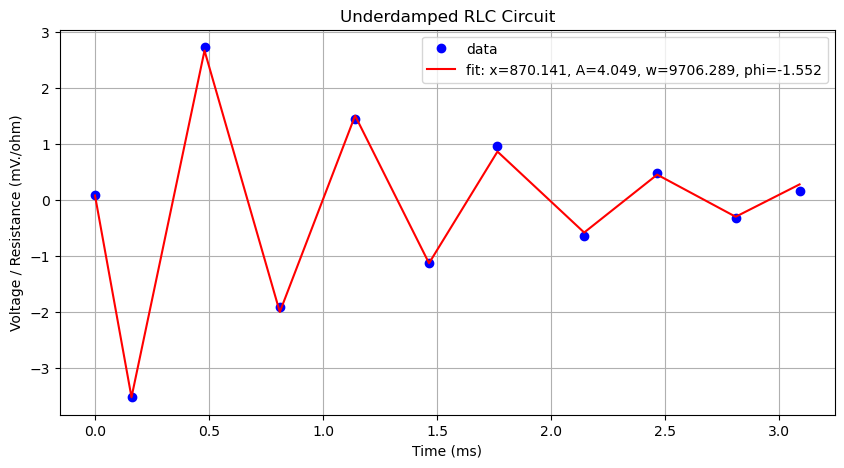

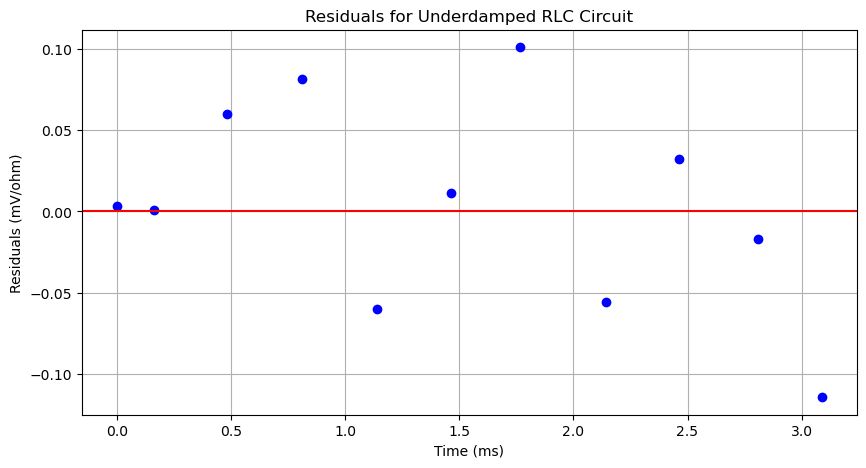

x (alpha): 870.1409758240061
w: 9706.289317694702


In [29]:
def part2a():
    time = [13.04,
            13.2,
            13.52,
            13.85,
            14.18,
            14.504,
            14.804,
            15.184,
            15.504,
            15.848,
            16.128,
            ]
    voltage = [3.97,
               -176,
                136,
                -96,
                72,
                -56,
                48,
                -32,
                24,
                -16,
                8
               ]

    # voltage = [x - voltage[0] for x in voltage] # normalize the data
    # perform a sinusoidal fit using the voltage values as the peaks of the damping oscillation and the time values as the time of the peaks

    # x is alpha
    # x = R / 2L = 50 / 2*.1 = 250
    # W0 = 1 / sqrt(LC) = 1 / sqrt(.1*.1*10^-6) = 1/10^-4 = 10000
    time_centered = [(t - 13.04)/1000 for t in time]
    voltage = [v/50 for v in voltage]

    def damping_cos(t, x, A, w, phi):
        return A * np.exp(-x*t) * np.cos(w * t - phi)
    
    # might have to multiply data by resistance in order to get the correct fit since this is for I
    popt, popc = curve_fit(damping_cos, time_centered, voltage, p0=[250, 180, 10000, 0])
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(time_centered) * 1000, voltage, 'bo', label='data')  # Convert time to milliseconds
    plt.plot(np.array(time_centered) * 1000, damping_cos(np.array(time_centered), *popt), 'r-', label='fit: x=%5.3f, A=%5.3f, w=%5.3f, phi=%5.3f' % tuple(popt))
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage / Resistance (mV./ohm)')
    plt.title('Underdamped RLC Circuit')
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

    residuals = voltage - damping_cos(np.array(time_centered), *popt)
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(time_centered) * 1000, residuals, 'bo')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Time (ms)')
    plt.ylabel('Residuals (mV/ohm)')
    plt.title('Residuals for Underdamped RLC Circuit')
    plt.grid()
    plt.show()

    print("x (alpha):", popt[0])
    print("w:", popt[2])
part2a()

## Part 2B: Overdamped RLC Circuit

###

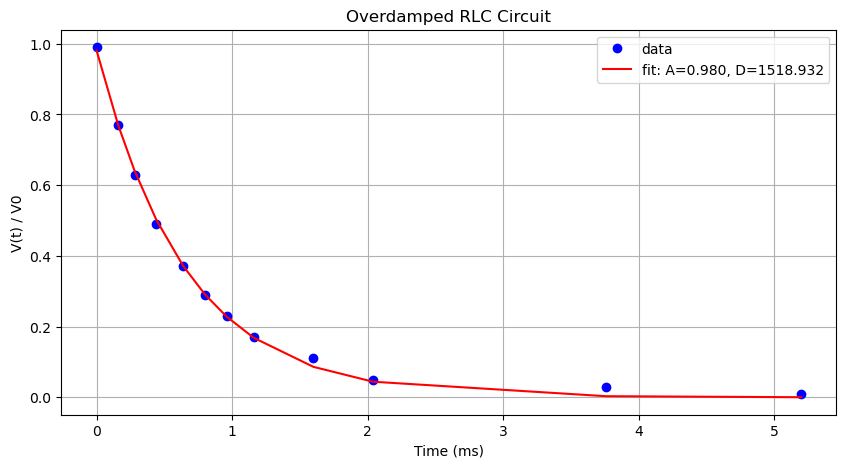

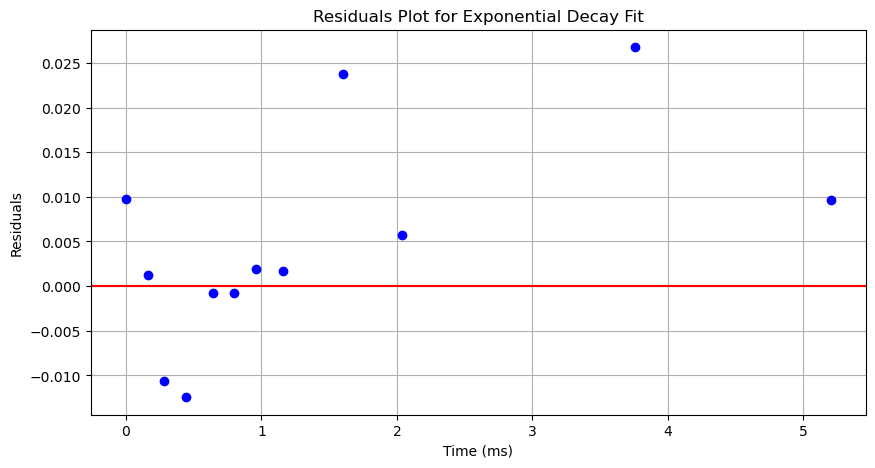

In [31]:
# fit the time and voltage to an exponential decay and plot it
def part2b():
    time = [-4.23,
            -4.07,
            -3.95,
            -3.79,
            -3.59,
            -3.43,
            -3.27,
            -3.07,
            -2.63,
            -2.19,
            -0.47,
            .97,
            ]
    voltage = [3.96,
           3.08,
           2.52,
           1.96,
           1.48,
           1.16,
           0.92,
           0.68,
           0.44,
           0.2,
           0.12,
           .04,
           ]
    
    # alpha = R / 2L = 10,000 / 2*.1 = 50,000
    # Omega = 1 / sqrt(.1*47*10^-6) = 461

    # divide all data by V0 (4)
    voltage_divided = [v / 4 for v in voltage]
    time_centered = [(t + 4.23)/1000 for t in time]

    def exp_decay(t, A, D):
        return A*np.exp(-D*t)

    popt, popc = curve_fit(exp_decay, time_centered, voltage_divided, p0=[1, 1])
    plt.figure(figsize=(10, 5))
    plt.plot(np.array(time_centered) * 1000, voltage_divided, 'bo', label='data')
    plt.plot(np.array(time_centered) * 1000, exp_decay(np.array(time_centered), *popt), 'r-', label='fit: A=%5.3f, D=%5.3f' % tuple(popt))
    plt.xlabel('Time (ms)')
    plt.ylabel('V(t) / V0')
    plt.title('Overdamped RLC Circuit')
    plt.legend()
    plt.grid()
    plt.show()

    residuals_exp_decay = voltage_divided - exp_decay(np.array(time_centered), *popt)

    plt.figure(figsize=(10, 5))
    plt.plot(np.array(time_centered) * 1000, residuals_exp_decay, 'bo')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel('Time (ms)')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot for Exponential Decay Fit')
    plt.grid()
    plt.show()
part2b()